# Basics of logistic regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

## Load the data

In [4]:
raw_data = pd.read_csv("2.01.+Admittance.csv")
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [5]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


## Variables

In [6]:
y = data['Admitted']
x1 = data['SAT']

# Let's plot the data

## Scatter plot

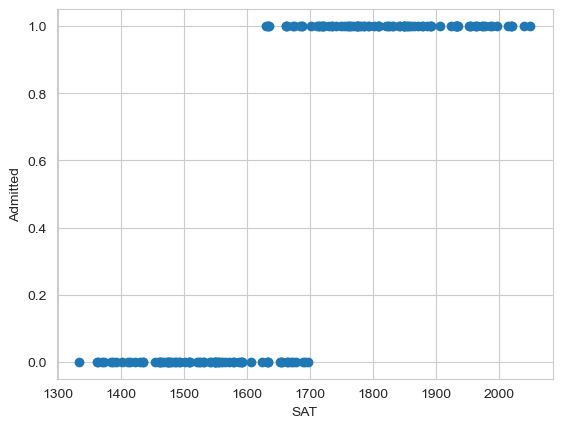

In [7]:
plt.scatter(x1, y)
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

In [15]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x).fit()
reg_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           2.98e-43
Time:                        14:39:01   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot a logistic regression

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


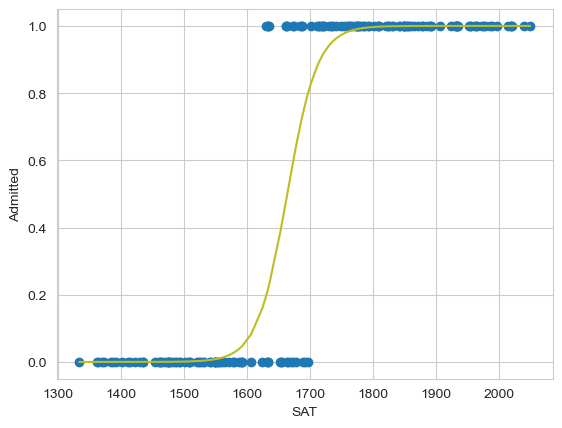

In [20]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x, b0, b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, c='C0')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.plot(x_sorted, f_sorted, c='C8')
plt.show()

This function shows the probability of admission given an SAT score